In [17]:
import yfinance as yf
import pandas as pd

In [11]:
# Download SPY daily data from 2015 to 2024
data = yf.download("^GSPC", start="2015-01-01", end="2024-12-31")

/var/folders/82/c29bxmf52717y1fzr6m_n77w0000gq/T/ipykernel_10725/1699659550.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("^GSPC", start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [21]:
# Flatten multiindex columns
data.columns = [col[0].capitalize() for col in data.columns]

# Keep only required columns
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Ensure index is datetime
data.index = pd.to_datetime(data.index)

# Drop any missing values
data.dropna(inplace=True)

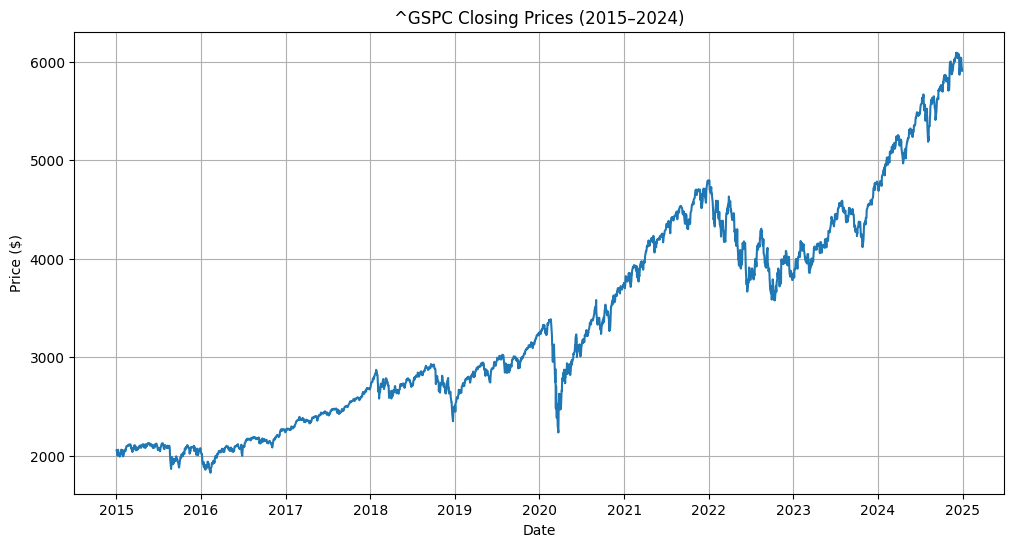

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title("^GSPC Closing Prices (2015–2024)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

In [25]:
import pandas as pd

class SmaCross(Strategy):
    n1 = 20
    n2 = 50

    def init(self):
        # self.data.Close is _Array, get underlying pd.Series via _series attribute
        close = pd.Series(self.data.Close)

        # Precompute rolling means with pandas
        sma1 = close.rolling(self.n1).mean().to_numpy()
        sma2 = close.rolling(self.n2).mean().to_numpy()

        # Register indicators with Backtesting.py
        self.sma1 = self.I(lambda: sma1)
        self.sma2 = self.I(lambda: sma2)

    def next(self):
        if crossover(self.sma1, self.sma2):
            self.buy()
        elif crossover(self.sma2, self.sma1):
            self.sell()


In [26]:
bt = Backtest(data, SmaCross, cash=10000, commission=.002)
results = bt.run()
bt.plot()

/Users/pelazas/Desktop/Builds/backtesting/.venv/lib/python3.13/site-packages/backtesting/backtesting.py:954: UserWarning: time=66: Broker canceled the relative-sized order due to insufficient margin.
  warnings.warn(
/Users/pelazas/Desktop/Builds/backtesting/.venv/lib/python3.13/site-packages/backtesting/backtesting.py:954: UserWarning: time=73: Broker canceled the relative-sized order due to insufficient margin.
  warnings.warn(
/Users/pelazas/Desktop/Builds/backtesting/.venv/lib/python3.13/site-packages/backtesting/backtesting.py:954: UserWarning: time=79: Broker canceled the relative-sized order due to insufficient margin.
  warnings.warn(
/Users/pelazas/Desktop/Builds/backtesting/.venv/lib/python3.13/site-packages/backtesting/backtesting.py:954: UserWarning: time=117: Broker canceled the relative-sized order due to insufficient margin.
  warnings.warn(
/Users/pelazas/Desktop/Builds/backtesting/.venv/lib/python3.13/site-packages/backtesting/backtesting.py:954: UserWarning: time=149:

GridPlot(id='p1349', ...)

In [27]:
results

Start                     2015-01-02 00:00:00
End                       2024-12-30 00:00:00
Duration                   3650 days 00:00:00
Exposure Time [%]                    65.84493
Equity Final [$]                          0.0
Equity Peak [$]                   10926.64168
Commissions [$]                      48.07942
Return [%]                             -100.0
Buy & Hold Return [%]               183.82512
Return (Ann.) [%]                           0
Volatility (Ann.) [%]               466.80435
CAGR [%]                               -100.0
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Alpha [%]                                 NaN
Beta                                      NaN
Max. Drawdown [%]                      -100.0
Avg. Drawdown [%]                   -19.83056
Max. Drawdown Duration     3245 days 00:00:00
Avg. Drawdown Duration      592 days 00:00:00
# Trades                          